In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
data1 = pd.read_csv("creditcard.csv")
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
features = list(data1.columns.values)
features.remove("Class")

X,Y = data1[features], data1["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,train_size= 0.7, random_state= 0)

La red neuronal será un perceptron multicapa y está formada por las siguientes capas:
- Capa de entrada con 30 neuronas
- Primera capa oculta con 16 neuronas
- Capa de salida con una neurona 

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,30)),
    keras.layers.Dense(16, activation=tf.nn.relu), # Capa oculta 1
    #keras.layers.Dense(16, activation=tf.nn.relu), # Capa oculta 2
    #keras.layers.Dense(16, activation=tf.nn.relu), # Capa oculta 3
    keras.layers.Dense(1, activation=tf.nn.sigmoid), #capa de salida
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


- A 50 epocas el modelo tuvo un gran tiempo de ajuste y se hizo un sobreajuste con precisión del 100%, se decidió ajustar el modelo con 10 epocas

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=1)

Epoch 1/10
199364/199364 [==============================] - 177s 883us/step - loss: 1.5437 - accuracy: 0.9970
Epoch 2/10
199364/199364 [==============================] - 169s 848us/step - loss: 0.1269 - accuracy: 0.9983
Epoch 3/10
199364/199364 [==============================] - 178s 893us/step - loss: 0.1330 - accuracy: 0.9982
Epoch 4/10
199364/199364 [==============================] - 194s 973us/step - loss: 0.1567 - accuracy: 0.9983
Epoch 5/10
199364/199364 [==============================] - 183s 916us/step - loss: 0.1409 - accuracy: 0.9983
Epoch 6/10
199364/199364 [==============================] - 177s 885us/step - loss: 0.1102 - accuracy: 0.9983
Epoch 7/10
199364/199364 [==============================] - 187s 938us/step - loss: 0.1165 - accuracy: 0.9982
Epoch 8/10
199364/199364 [==============================] - 198s 993us/step - loss: 0.1258 - accuracy: 0.9982
Epoch 9/10
199364/199364 [==============================] - 203s 1ms/step - loss: 0.1670 - accuracy: 0.9983
Epoch 10/10


In [11]:
loss_train = history.history['loss']
acc_train = history.history['accuracy']

dic = {'C.E':loss_train,'P.E':acc_train}
data2 = pd.DataFrame(dic)

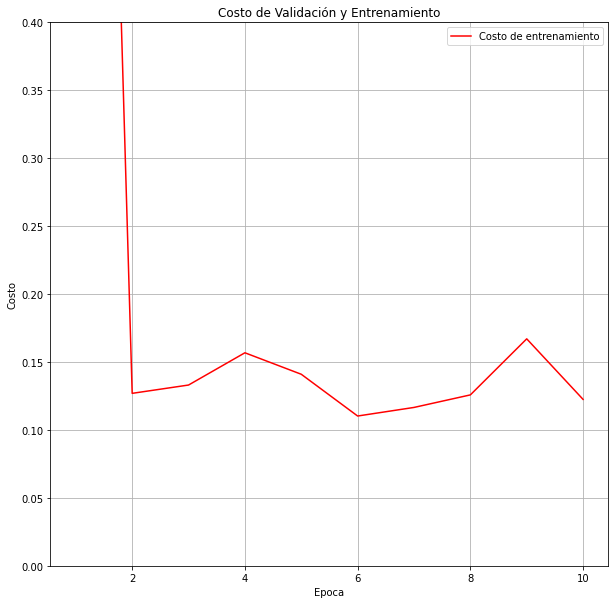

In [25]:
epochs_loss = range(1,len(loss_train)+1)


fig = plt.figure(figsize=(10, 10))

plt.plot(epochs_loss, loss_train, 'r', label='Costo de entrenamiento')
#plt.plot(epochs_loss, acc_train, 'g', label='Precisión de entrenamiento')
plt.title('Costo de Validación y Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Costo')
plt.ylim(0,0.4)
plt.grid()
plt.legend()



In [27]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

2671/2671 [==============================] - 2s 704us/step - loss: 0.0397 - accuracy: 0.9983
